In [364]:
import pandas as pd 
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
import tensorflow.keras.utils as utils
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.datasets import make_classification
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import classification_report,confusion_matrix

In [365]:
# read in CSV files, add column labels 

df = pd.read_csv('enviro_data.csv', names=['DTG', 'temp', 'humidity', 'baro_pressure', 'co_2', 'tvoc', 'uv_raw', 
                                           'amb_raw', 'uv_idx', 'lux','violet', 'indigo', 'blue', 'cyan', 'green', 
                                           'yellow', 'orange', 'red', 'loc_class'])

In [366]:
df.head()

,DTG,temp,humidity,baro_pressure,co_2,tvoc,uv_raw,amb_raw,uv_idx,lux,violet,indigo,blue,cyan,green,yellow,orange,red,loc_class
0,2021-08-04 10:57:52,28.568,42.925,1020.728,400,0,98,59186,4.090,47338.4,65535,65535,65535,65535,65535,65535,65535,65535,blue
1,2021-08-04 10:57:54,28.612,42.682,1020.742,400,0,99,59865,4.132,47916.8,65535,65535,65535,65535,65535,65535,65535,65535,blue
2,2021-08-04 10:57:56,28.619,42.151,1020.720,400,0,99,60124,4.216,48069.6,65535,65535,65535,65535,65535,65535,65535,65535,blue
3,2021-08-04 10:57:58,28.595,41.746,1020.713,400,0,99,59416,4.090,46434.4,65535,65535,65535,65535,65535,65535,65535,65535,blue
4,2021-08-04 10:58:00,28.629,41.451,1020.549,400,0,54,27978,2.254,23488.8,56330,65535,65535,65535,65535,65535,65535,65535,blue


In [367]:
df = df.drop(columns=['DTG', 'co_2', 'uv_raw', 'amb_raw'], axis=1)

In [368]:
df.columns

Index(['temp', 'humidity', 'baro_pressure', 'tvoc', 'uv_idx', 'lux', 'violet',
       'indigo', 'blue', 'cyan', 'green', 'yellow', 'orange', 'red',
       'loc_class'],
      dtype='object')

In [369]:
labels = df['loc_class']

In [370]:
# dataset = df.values
X = dataset[:,0:14].astype(float)
y = dataset[:,14]

In [371]:
# encode class values as integers
encoder = LabelEncoder()
encoder.fit(y)
encoded_y = encoder.transform(y)

In [372]:
# convert integers to dummy variables (i.e. one hot encoded)
y = utils.to_categorical(encoded_y)

In [373]:
# define baseline model
def baseline_model():
	# create model
	model = Sequential()
	model.add(Dense(28, input_dim=14, activation='relu'))
	model.add(Dense(3, activation='softmax'))
	# Compile model
	model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
	return model


In [374]:
scaler = MinMaxScaler()

In [375]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [376]:
X_train = scaler.fit_transform(X_train)

In [377]:
X_test = scaler.transform(X_test)

In [378]:
model = baseline_model()

In [379]:
model.fit(X_train, y_train, epochs=10, batch_size=4, verbose=1)

Epoch 1/10
1236/1236 [==============================] - 1s 467us/step - loss: 0.6814 - accuracy: 0.6650
Epoch 2/10
1236/1236 [==============================] - 1s 462us/step - loss: 0.2188 - accuracy: 0.9310
Epoch 3/10
1236/1236 [==============================] - 1s 458us/step - loss: 0.1644 - accuracy: 0.9371
Epoch 4/10
1236/1236 [==============================] - 1s 461us/step - loss: 0.1511 - accuracy: 0.9424
Epoch 5/10
1236/1236 [==============================] - 1s 460us/step - loss: 0.1286 - accuracy: 0.9490
Epoch 6/10
1236/1236 [==============================] - 1s 462us/step - loss: 0.1119 - accuracy: 0.9587
Epoch 7/10
1236/1236 [==============================] - 1s 467us/step - loss: 0.0990 - accuracy: 0.9633
Epoch 8/10
1236/1236 [==============================] - 1s 464us/step - loss: 0.0934 - accuracy: 0.9656
Epoch 9/10
1236/1236 [==============================] - 1s 470us/step - loss: 0.0854 - accuracy: 0.9646
Epoch 10/10
1236/1236 [==============================] - 1s 470u

In [380]:
loss = pd.DataFrame(model.history.history)

<AxesSubplot:>

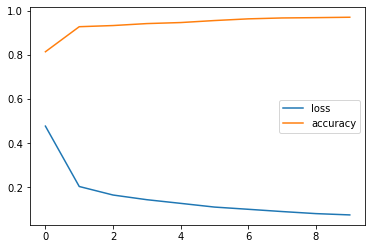

In [381]:
loss.plot()

In [382]:
#predictions = model.predict_classes(X_test)

predictions = np.argmax(model.predict(X_test), axis=-1)

In [383]:
predictions

array([1, 1, 2, ..., 0, 2, 2])

In [384]:
type(predictions)

numpy.ndarray

In [385]:
y_test

array([[0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       ...,
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 0., 1.]], dtype=float32)

In [386]:
type(y_test[0][0])

numpy.float32

In [387]:
y_test.astype(int)

array([[0, 1, 0],
       [0, 1, 0],
       [0, 0, 1],
       ...,
       [1, 0, 0],
       [0, 0, 1],
       [0, 0, 1]])

In [388]:
def convert_to_int(some_array):
    true_values = []
    for val in some_array:
        if val[0] == 1:
            true_values.append(0)
        elif val[1] == 1:
            true_values.append(1)
        elif val[2] == 1:
            true_values.append(2)
    
    return true_values


In [389]:
true_y = convert_to_int(y_test)

In [390]:
predictions = pd.DataFrame(predictions)

In [391]:
true_y = pd.DataFrame(true_y)

In [392]:
both = [predictions, true_y]

In [393]:
results = pd.concat(both, axis=1)

In [394]:
results.columns

Int64Index([0, 0], dtype='int64')

In [395]:
results.columns=['Predictions', 'True Values']

In [396]:
results.head()

,Predictions,True Values
0,1,1
1,1,1
2,2,2
3,0,0
4,2,2


In [397]:
results['Correct'] = results['Predictions'] == results['True Values']

In [398]:
results.head()

,Predictions,True Values,Correct
0,1,1,True
1,1,1,True
2,2,2,True
3,0,0,True
4,2,2,True


In [399]:
nbr_correct = results['Correct'].sum()

In [400]:
total_row = len(results)

In [401]:
accuracy = nbr_correct / total_row

In [402]:
accuracy

0.9504483246814536

In [403]:
# import tensorflow as tf

In [404]:
# Convert the model to a tflite model

# converter = tf.lite.TFLiteConverter.from_keras_model(model)
# tflite_model = converter.convert()

In [405]:
# Save the model

# with open('model.tflite', 'wb') as f:
#   f.write(tflite_model)